# 0 Load data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [2]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
testData.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
all_data = pd.concat([trainData, testData], axis=0)
all_data.info()
all_data = all_data.drop('PassengerId',axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# 1 Data Analysis

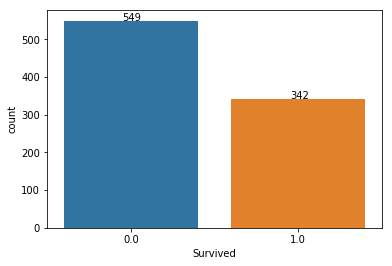

In [7]:
ax = sns.countplot(all_data['Survived'])
for a in ax.patches:
    ax.annotate('{:d}'.format(a.get_height()), (a.get_x()+0.35, a.get_height()+1))

In [8]:
categorical_features = all_data.select_dtypes(include = ["object", "category"]).columns
print("# of categorical features: " + str(len(categorical_features)))
for cat_fea in list(categorical_features):
    print(cat_fea)

# of categorical features: 5
Cabin
Embarked
Name
Sex
Ticket


In [9]:
numerical_features = all_data.select_dtypes(exclude = ["object"]).columns
print("# of numerical features: " + str(len(numerical_features)))
for num_fea in list(numerical_features):
    print(num_fea)

# of numerical features: 6
Age
Fare
Parch
Pclass
SibSp
Survived


# 2 Categorical Features

## 2.1 Cabin

In [10]:
all_data['Cabin'].isnull().sum()

1014

In [11]:
all_data['Cabin'] = all_data['Cabin'].str[:1]

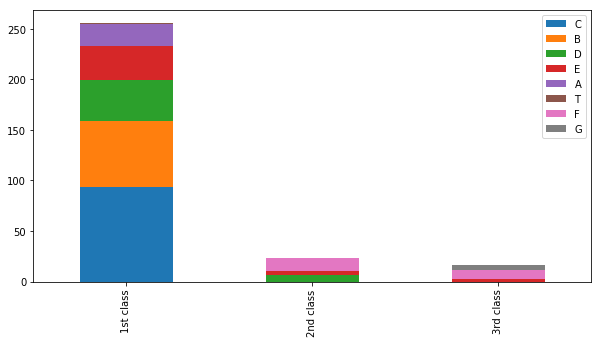

In [12]:
Pclass1 = all_data[all_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = all_data[all_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = all_data[all_data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

1st class: T, A, B, C, D, E  
2nd class: D, E, F  
3rd class: E, F, G

In [13]:
all_data['Cabin'] = all_data['Cabin'].replace({"T": 0, "A": 0.4, "B": 0.8, "C": 1.2, "D": 1.6, "E": 2.0, "F": 2.4, "G": 2.8})

In [14]:
all_data['Cabin'].fillna(all_data.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

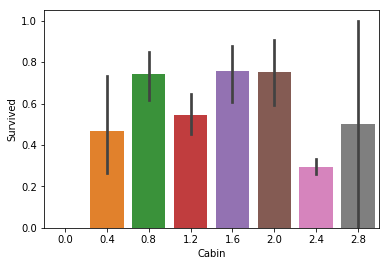

In [15]:
sns.barplot(x = all_data['Cabin'],y = all_data['Survived'])

## 2.2 Embarked 

C = Cherbourg  
Q = Queenstown  
S = Southampton

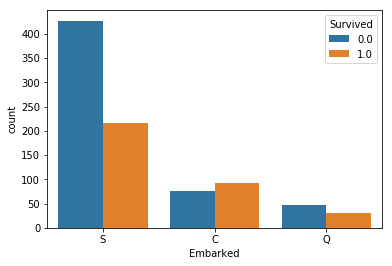

In [16]:
sns.countplot(all_data["Embarked"], hue=all_data["Survived"])

In [17]:
all_data['Embarked'] = all_data['Embarked'].replace({"S":1, "C":2, "Q":3})

### 2.2.1 Handing missing value

In [18]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,0.8,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
829,62.0,0.8,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [19]:
all_data.groupby(by=["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       1.0         52.0000
        2.0         76.7292
        3.0         90.0000
2       1.0         15.3750
        2.0         15.3146
        3.0         12.3500
3       1.0          8.0500
        2.0          7.8958
        3.0          7.7500
Name: Fare, dtype: float64

In [20]:
all_data['Embarked'] = all_data['Embarked'].fillna(2)

## 2.3 Name

By observing the name data, we can see that it includes the title of passengers, such as: Mr, Miss, Mrs, etc. The title information includes the age and gender of the passenger, and also includes the title such as social status, such as: Dr, , Lady, Major, Master, etc.

In [21]:
trainData['Title'] = trainData['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(trainData['Title'], trainData['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


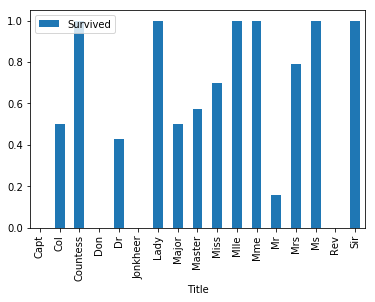

In [22]:
trainData[['Title','Survived']].groupby(['Title']).mean().plot.bar()

In [23]:
# extract title from name. such as Mr, Mrs...
all_data['Title'] = all_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
all_data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Capt          1
Dona          1
Countess      1
Mme           1
Lady          1
Don           1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

### 2.3.1Title map

In [24]:
all_data['Title'] = all_data['Title'].replace({"Mr":0, "Miss":2, "Mrs":1, "Master":3, "Dr":5, "Rev":5, "Col":5, "Major":5, "Mlle":2,"Countess":4, "Ms":1, "Lady":4, "Jonkheer":3, "Don":4, "Dona":4, "Mme":1, "Capt":5, "Sir":4})

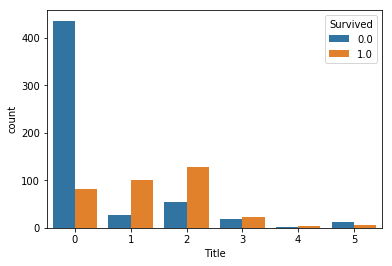

In [25]:
sns.countplot(all_data["Title"], hue=all_data["Survived"])
all_data.drop('Name', axis=1, inplace=True)

## 2.4 Sex

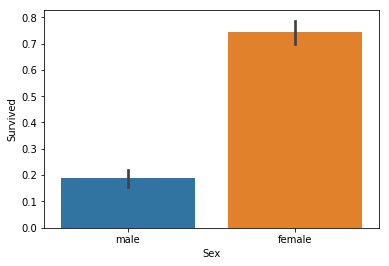

In [26]:
sns.barplot(x = all_data["Sex"],y = all_data["Survived"])

The survival rate for female is several times higher than for male. Maybe because the female got on the boat first.

In [27]:
all_data['Sex'] = all_data['Sex'].replace({"male" : 0, "female" : 1})

## 2.5 Ticket

Added the TicketGroup feature to count the number of passengers with the same ticket number.

In [28]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
all_data = all_data.drop(columns = ['Ticket'])

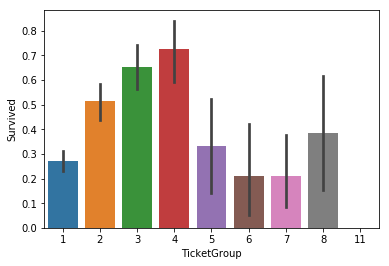

In [29]:
sns.barplot(x = all_data["TicketGroup"],y = all_data["Survived"])

# 3 Numerical Features

## 3.1 Pclass: Class of Travel

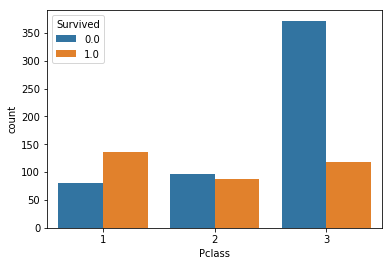

In [30]:
sns.countplot(all_data["Pclass"], hue=all_data["Survived"])

The higher the passenger's class, the higher the survival rate.(1>2>3)

## 3.2 Age: Age of Passengers

Text(12.359751157407416, 0.5, 'density')

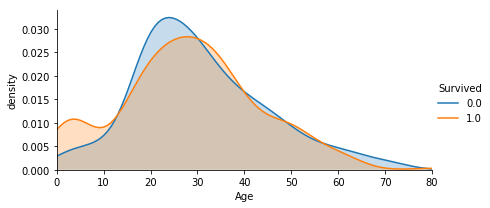

In [31]:
facet = sns.FacetGrid(all_data, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, all_data['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('density') 

The density map of the surviving situation shows that there is a significant difference in the survival rate on the left side of the age of 15 years. The non-intersection area of the density map is very large, but in other age groups, the difference is not very obvious, and it is considered to be random. Therefore, it is possible to consider separating this age-small area.

### 3.2.1 Handling Missing Values

We can construct a random forest model with three features of Sex, Title, Pclass, and fill in age missing values.

In [32]:
from sklearn.ensemble import RandomForestRegressor
age_df = all_data[['Age', 'Pclass','Sex','Title']]
age_df=pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges 

### 3.2.2 Binning

In [33]:
all_data['Age'] = pd.cut(all_data['Age'], [-1, 16, 32, 64, 100], labels = ["0", "1", "2", "3"])

In [34]:
all_data['Age'] = all_data['Age'].replace({"0" : 0, "1": 1, "2": 2, "3": 3})

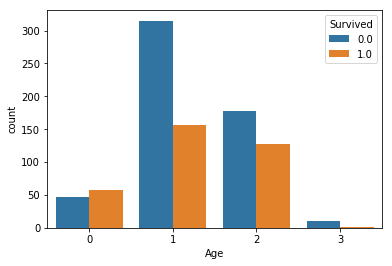

In [35]:
sns.countplot(x = all_data['Age'],hue = all_data["Survived"])

## 3.3 SibSp: Number of Sibling/Spouse aboard

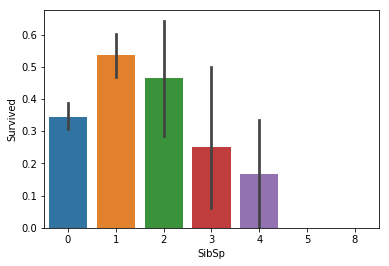

In [36]:
sns.barplot(x=all_data["SibSp"], y=all_data["Survived"])

## 3.4 Parch: Number of Parent/Child aboard

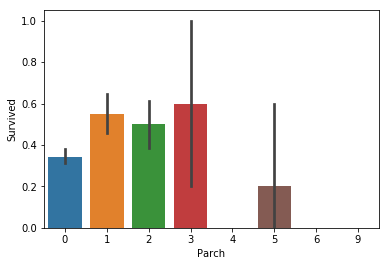

In [37]:
sns.barplot(x=all_data["Parch"], y=all_data["Survived"])

## 3.5 FamilySize

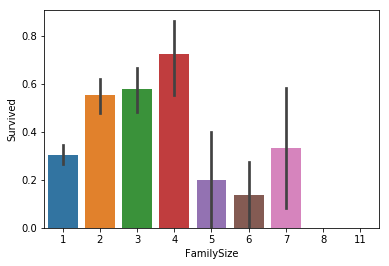

In [38]:
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp'] + 1
all_data = all_data.drop('Parch', axis = 1)
all_data = all_data.drop('SibSp', axis = 1)
sns.barplot(x=all_data["FamilySize"], y=all_data["Survived"])

## 3.6 Fare: Passenger fare

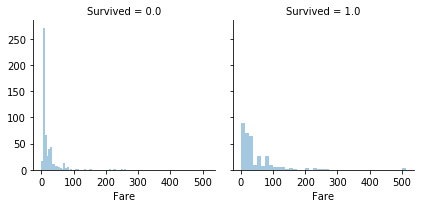

In [39]:
s = sns.FacetGrid(all_data, col='Survived')
s.map(sns.distplot, 'Fare', kde=False)

### 3.6.1 Handling Missing Values

In [40]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Pclass,Sex,Survived,Title,TicketGroup,FamilySize
152,2,2.4,1.0,NaN,3,0,NaN,0,1,1


In [41]:
all_data["Fare"].fillna(all_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)

#  4 Correlation

In [42]:
correlation = all_data.corr()
survivedCorrelation = correlation['Survived']
print(survivedCorrelation.sort_values(ascending=False))

Survived       1.000000
Sex            0.543351
Title          0.378807
Fare           0.257307
Embarked       0.111203
TicketGroup    0.064962
FamilySize     0.016639
Age           -0.045697
Cabin         -0.257586
Pclass        -0.338481
Name: Survived, dtype: float64


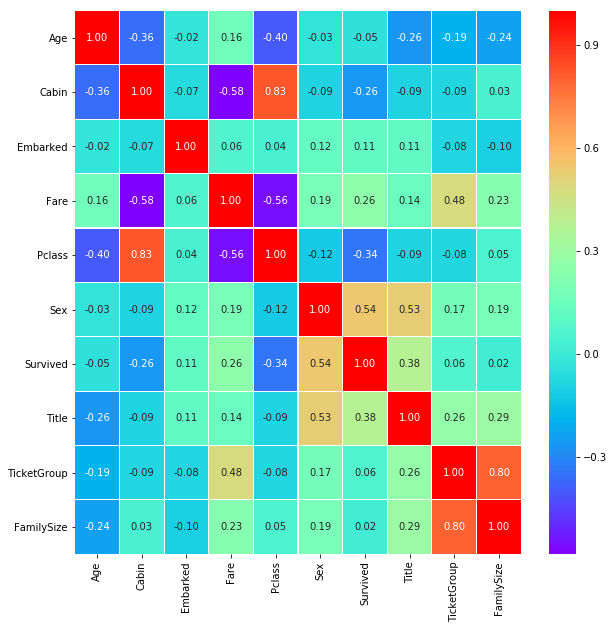

In [43]:
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", linewidths = .1, cmap='rainbow')

In [44]:
abs(correlation['Survived']).sort_values()

FamilySize     0.016639
Age            0.045697
TicketGroup    0.064962
Embarked       0.111203
Fare           0.257307
Cabin          0.257586
Pclass         0.338481
Title          0.378807
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

# 5 Seperate train and test data.

In [45]:
backup = all_data.copy()

In [46]:
all_data = backup
all_data = all_data.drop(columns = ['FamilySize'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age            1309 non-null int64
Cabin          1309 non-null float64
Embarked       1309 non-null float64
Fare           1309 non-null float64
Pclass         1309 non-null int64
Sex            1309 non-null int64
Survived       891 non-null float64
Title          1309 non-null int64
TicketGroup    1309 non-null int64
dtypes: float64(4), int64(5)
memory usage: 102.3 KB


In [47]:
train = all_data[all_data['Survived'].notnull()]
train.shape
feature = train.drop('Survived', axis = 1)
target = train['Survived']

feature.shape, target.shape

((891, 8), (891,))

In [48]:
test = all_data[all_data['Survived'].isnull()].drop('Survived', axis = 1)
test.shape
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
Age            418 non-null int64
Cabin          418 non-null float64
Embarked       418 non-null float64
Fare           418 non-null float64
Pclass         418 non-null int64
Sex            418 non-null int64
Title          418 non-null int64
TicketGroup    418 non-null int64
dtypes: float64(3), int64(5)
memory usage: 29.4 KB


# 6 Train and test

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
def grid_search(estimator, param_test):
    gsearch = GridSearchCV(estimator, param_grid = param_test, scoring='roc_auc', cv=10)
    gsearch.fit(feature, target)
    print(gsearch.best_params_, gsearch.best_score_)

In [51]:
#from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
def print_cross_val_score(clf, feature, target):
    print('accuracy_score：', cross_val_score(clf, feature, target, scoring='accuracy', cv=10, n_jobs=1).mean())
    print('precision_score：', cross_val_score(clf, feature, target, scoring='precision', cv=10, n_jobs=1).mean())  
    print('recall_score：', cross_val_score(clf, feature, target, scoring='recall', cv=10, n_jobs=1).mean())
    print('F1_score：', cross_val_score(clf, feature, target, scoring='f1', cv=10, n_jobs=1).mean())

In [52]:
from sklearn.model_selection import train_test_split
def train_test(clf, feature, target):
    X_train, X_test, y_train, y_test = train_test_split(feature, target)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    return clf

In [53]:
def my_predict(clf, test):
    pred = clf.predict(test)
    res = pd.DataFrame({
        'PassengerId':testData['PassengerId'],
        'Survived':pred,}, index = test.index)
    res['Survived'] = res['Survived'].astype(int)
    return res

## 6.1 Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

### Parameter Tuning

### train

In [55]:
clf = LogisticRegression()
clf = train_test(clf, feature, target)
print_cross_val_score(clf, feature, target)
res = my_predict(clf, test)
res.to_csv('lg_pred.csv',index=False)

accuracy_score： 0.8025167404380887
precision_score： 0.7657025390801482
recall_score： 0.701764705882353
F1_score： 0.7307504485203166


## 6.2 Naive Bayes 

In [56]:
from sklearn.naive_bayes import GaussianNB

### Parameter Tuning

### train

In [57]:
clf = GaussianNB() 
clf = train_test(clf, feature, target)
print_cross_val_score(clf, feature, target)
res = my_predict(clf, test)
res.to_csv('nb_pred.csv',index=False)

accuracy_score： 0.7587197820905687
precision_score： 0.676894036027836
recall_score： 0.7195798319327732
F1_score： 0.6956886991885957


## 6.3 KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

### Parameter Tuning

### train

In [59]:
clf = KNeighborsClassifier()
clf = train_test(clf, feature, target)
print_cross_val_score(clf, feature, target)
res = my_predict(clf, test)
res.to_csv('knn_pred.csv',index=False)

accuracy_score： 0.7812308478038814
precision_score： 0.7284996834562399
recall_score： 0.6901680672268908
F1_score： 0.7049456409851835


## 6.4 SVM 

In [60]:
from sklearn.svm import SVC

### Parameter Tuning

### train

In [61]:
clf = SVC()
clf = train_test(clf, feature, target)
print_cross_val_score(clf, feature, target)
res = my_predict(clf, test)
res.to_csv('SVM_pred.csv',index=False)

accuracy_score： 0.8014816706389739
precision_score： 0.7532105711008483
recall_score： 0.7253781512605043
F1_score： 0.7357439162059076


## 6.5 Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

### Parameter Tuning

In [63]:
classifier = DecisionTreeClassifier()
param_test = {'max_features':['auto', 'log2', 'sqrt'],
              'max_depth':list(range(2,8))}
#grid_search(classifier, param_test)

### train

In [64]:
clf = DecisionTreeClassifier(max_features = 'log2', max_depth = 5)
clf = train_test(clf, feature, target)
print_cross_val_score(clf, feature, target)
res = my_predict(clf, test)
res.to_csv('dt_pred.csv',index=False)

accuracy_score： 0.8270987969583474
precision_score： 0.7934171868587886
recall_score： 0.7366386554621849
F1_score： 0.7392811470494098


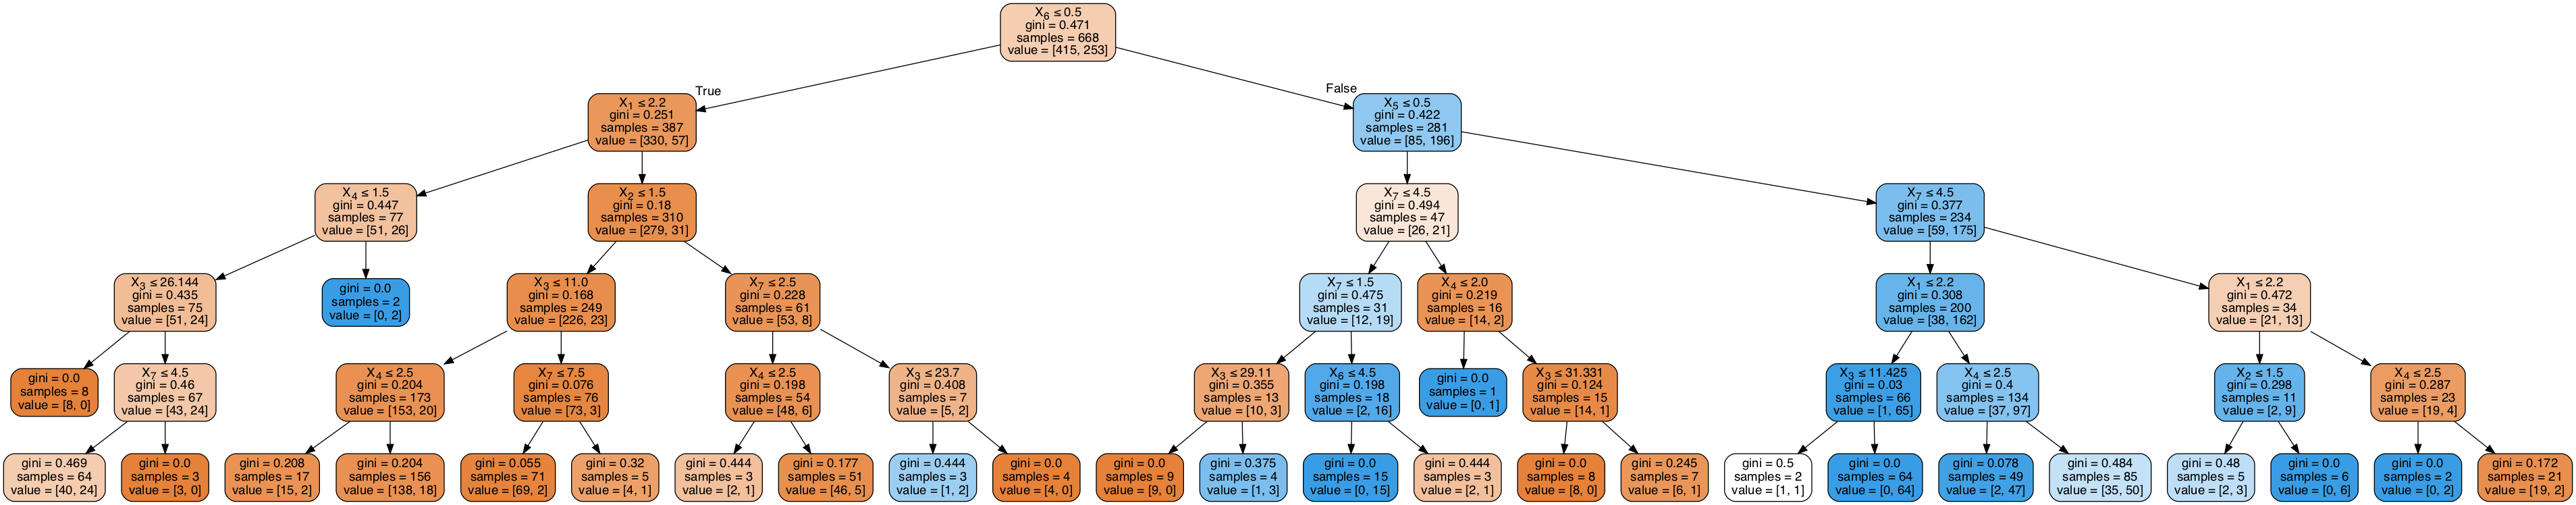

In [65]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

## 6.6 Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

### Parameter Tuning

In [67]:
estimator = RandomForestClassifier(random_state = 10, max_features = 'sqrt')
param_test = {'n_estimators':list(range(20,50,2)), 
              'max_depth':list(range(3,60,3))}
#grid_search(estimator, param_test)

### train

In [68]:
clf = RandomForestClassifier(n_estimators = 20, max_depth = 6, random_state = 10, max_features = 'sqrt') 
clf = train_test(clf, feature, target)
print_cross_val_score(clf, feature, target)
res = my_predict(clf, test)
res.to_csv('rfc_pred.csv',index=False)

accuracy_score： 0.828247644989218
precision_score： 0.805452299045041
recall_score： 0.7308403361344538
F1_score： 0.7625519705906699


## 6.7 XGDT

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Parameter Tuning

In [70]:
classifier = GradientBoostingClassifier(random_state = 10, max_features = 'sqrt')
param_test = {'n_estimators':list(range(20,50,2)), 
              'max_depth':list(range(3,60,3))}
#grid_search(classifier, param_test)

### train

In [71]:
clf = GradientBoostingClassifier()
clf = train_test(clf, feature, target)
print_cross_val_score(clf, feature, target)
res = my_predict(clf, test)
res.to_csv('gbdt_pred.csv',index=False)

accuracy_score： 0.8238664737260242
precision_score： 0.7933616583009372
recall_score： 0.7311764705882352
F1_score： 0.7567443852483811


## 6.8 XGBoost

In [72]:
from xgboost.sklearn import XGBClassifier

### Parameter Tuning

In [73]:
classifier = XGBClassifier(random_state = 10, max_features = 'sqrt')
param_test = {'n_estimators':list(range(20,50,2)), 
              'max_depth':list(range(3,60,3))}
#grid_search(classifier, param_test)

### train

In [74]:
clf = XGBClassifier()
clf = train_test(clf, feature, target)
print_cross_val_score(clf, feature, target)
res = my_predict(clf, test)
res.to_csv('xgboost_pred.csv',index=False)

accuracy_score： 0.8350896606514585
precision_score： 0.8211802053737538
recall_score： 0.7312605042016805
F1_score： 0.7698130811978229


## 6.9 NN

In [75]:
import tensorflow as tf
from tensorflow.keras import layers

In [76]:
# train model with validation set
model = tf.keras.Sequential()
# Adds a densely-connected layer with 10 units to the model
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.train.AdamOptimizer(0.001), loss='binary_crossentropy', metrics=['accuracy'])
X_train, X_cv, Y_train, Y_cv = train_test_split(feature, target, test_size=0.2)
history = model.fit(X_train.values, Y_train.values, epochs=200, batch_size=16, validation_data=(X_cv.values, Y_cv.values))

Instructions for updating:
Colocations handled automatically by placer.
Train on 712 samples, validate on 179 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
712/712 [==============================] - 1s 1ms/sample - loss: 1.9687 - acc: 0.6166 - val_loss: 1.0465 - val_acc: 0.6257
Epoch 2/200
712/712 [==============================] - 0s 201us/sample - loss: 0.6123 - acc: 0.6966 - val_loss: 0.5285 - val_acc: 0.7765
Epoch 3/200
712/712 [==============================] - 0s 196us/sample - loss: 0.5512 - acc: 0.7261 - val_loss: 0.5172 - val_acc: 0.7765
Epoch 4/200
712/712 [==============================] - 0s 238us/sample - loss: 0.5455 - acc: 0.7303 - val_loss: 0.5093 - val_acc: 0.7821
Epoch 5/200
712/712 [==============================] - 0s 245us/sample - loss: 0.5428 - acc: 0.7388 - val_loss: 0.5030 - val_acc: 0.7989
Epoch 6/200
712/712 [==============================] - 0s 228us/sample - loss: 0.5351 - acc: 0.7402 - val_loss: 0.4955 - val_acc: 0.7933
Epoch 7/200
71

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


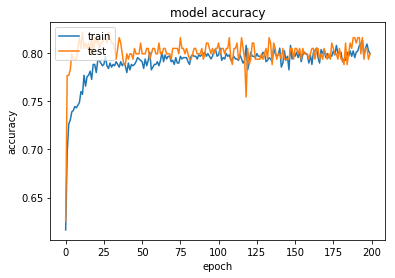

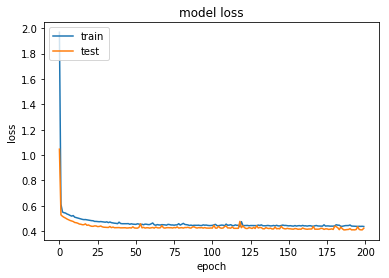

In [77]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
from keras import backend as K
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred, beta=1):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    f1_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return f1_score

Using TensorFlow backend.


In [79]:
from sklearn.preprocessing import Binarizer

Y_pred = model.predict(X_cv.values)
threshold = 0.5
binarizer = Binarizer(threshold)
Y_pred = binarizer.fit_transform(Y_pred)
Y_pred = Y_pred.astype(np.int32)
Y_pred = tf.convert_to_tensor(Y_pred, np.float32)
Y_cv = Y_cv.values.reshape(-1, 1)
Y_cv = binarizer.fit_transform(Y_cv)
Y_cv = Y_cv.astype(np.int32)
Y_cv = tf.convert_to_tensor(Y_cv, np.float32)

In [80]:
accuracy_score = history.history['acc']
print('accuracy_score：',accuracy_score[-1])
sess = tf.Session()
precision_score = precision(Y_cv, Y_pred)
recall_score = recall(Y_cv, Y_pred)
print('precision_score：', sess.run(precision_score))
print('recall_score：',sess.run(recall_score))
beta=1
bb = beta ** 2
F1_score = (1 + bb) * (precision_score * recall_score) / (bb * precision_score + recall_score + K.epsilon())
print('F1_score：',sess.run(F1_score))

accuracy_score： 0.7991573
precision_score： 0.8113208
recall_score： 0.6231884
F1_score： 0.70491797


In [81]:
predictions = model.predict(test)
threshold = 0.5
binarizer = Binarizer(threshold)
final_preds = binarizer.fit_transform(predictions)
final_preds = final_preds.astype(np.int32)
res = testData[["PassengerId"]].copy()
res["Survived"] = final_preds

res.to_csv('nn_pred.csv', index=False)